In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

In [60]:
df  = pd.read_csv('india-car-dataset.csv')

In [61]:
df

,OEM,MODEL,BODY TYPE,PRICE IN LAKHS,YEAR,MONTH,SALE,SALE OUT OF
0,Datsun,Go,Hatchback,4.03,2020,1,88.0,1163.0
1,Datsun,Go Plus,MUV,4.26,2020,1,55.0,1163.0
2,Datsun,RediGo,Hatchback,3.98,2020,1,1020.0,1163.0
3,Honda,Amaze,Sedan,6.39,2020,1,3160.0,5239.0
4,Honda,City,Sedan,11.23,2020,1,1734.0,5239.0
...,...,...,...,...,...,...,...,...
1891,Volkswagen,Polo,Hatchback,6.49,2021,12,762.0,3700.0
1892,Volkswagen,Taigun,SUV,11.00,2021,12,2828.0,3700.0
1893,Volkswagen,Tiguan,SUV,11.00,2021,12,40.0,3700.0
1894,Volkswagen,T-Roc,SUV,21.35,2021,12,NaN,3700.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OEM             1896 non-null   object 
 1   MODEL           1896 non-null   object 
 2   BODY TYPE       1896 non-null   object 
 3   PRICE IN LAKHS  1896 non-null   float64
 4   YEAR            1896 non-null   int64  
 5   MONTH           1896 non-null   int64  
 6   SALE            1612 non-null   float64
 7   SALE OUT OF     1821 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 118.6+ KB


In [63]:
df['BODY TYPE'].value_counts()

SUV          834
Hatchback    432
Sedan        348
MUV          186
Van           72
Electric      24
Name: BODY TYPE, dtype: int64

In [64]:
df[['PRICE IN LAKHS','SALE','SALE OUT OF']].describe()

,PRICE IN LAKHS,SALE,SALE OUT OF
count,1896.000000,1612.000000,1821.000000
mean,13.496709,3363.013027,31949.901702
std,12.950518,4414.731147,43394.165777
min,3.130000,1.000000,23.000000
25%,6.000000,181.750000,3336.000000
50%,9.290000,1632.000000,13002.000000
75%,15.000000,4462.750000,38200.000000
max,89.850000,24589.000000,163656.000000


In [65]:
df = df.drop(columns = ['SALE OUT OF'],axis =1)

In [66]:
#checking missing values
df.isnull().sum()

OEM                 0
MODEL               0
BODY TYPE           0
PRICE IN LAKHS      0
YEAR                0
MONTH               0
SALE              284
dtype: int64

In [67]:
#replacing missing values
df['SALE'].fillna(0,inplace = True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OEM             1896 non-null   object 
 1   MODEL           1896 non-null   object 
 2   BODY TYPE       1896 non-null   object 
 3   PRICE IN LAKHS  1896 non-null   float64
 4   YEAR            1896 non-null   int64  
 5   MONTH           1896 non-null   int64  
 6   SALE            1896 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 103.8+ KB


C:\Users\hb728\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


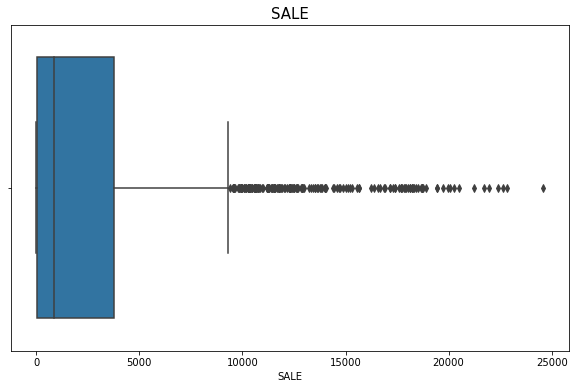

In [69]:
#checking outliers
plt.figure(figsize = (10,6))
sns.boxplot(df['SALE'])
plt.title('SALE',size =15)
plt.show()

In [70]:
#removing of outliers
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    Lower_range = Q1-(1.5*IQR)
    Upper_range = Q3+(1.5*IQR)
    return Lower_range,Upper_range

In [71]:
Lowersale,uppersale = remove_outliers(df['SALE'])

In [72]:
Lowersale

-5533.75

In [73]:
uppersale

9334.25

In [74]:
df['SALE'] = np.where(df['SALE']>uppersale,uppersale,df['SALE'])
df['SALE'] = np.where(df['SALE']<Lowersale,Lowersale,df['SALE'])

C:\Users\hb728\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


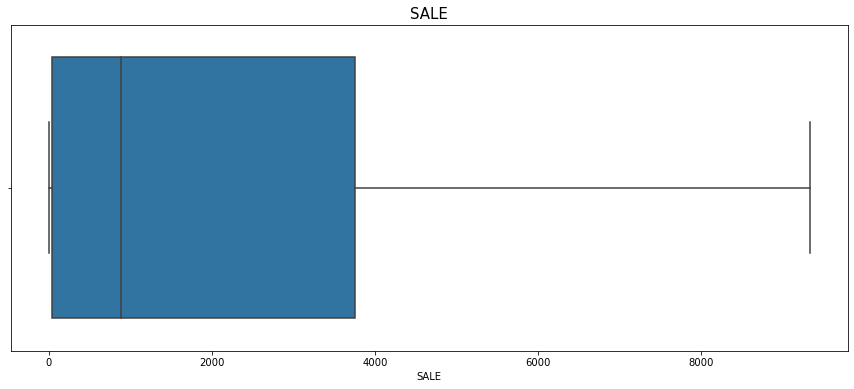

In [82]:
plt.figure(figsize = (15,6))
sns.boxplot(df['SALE'])
plt.title('SALE',size =15)
plt.show()

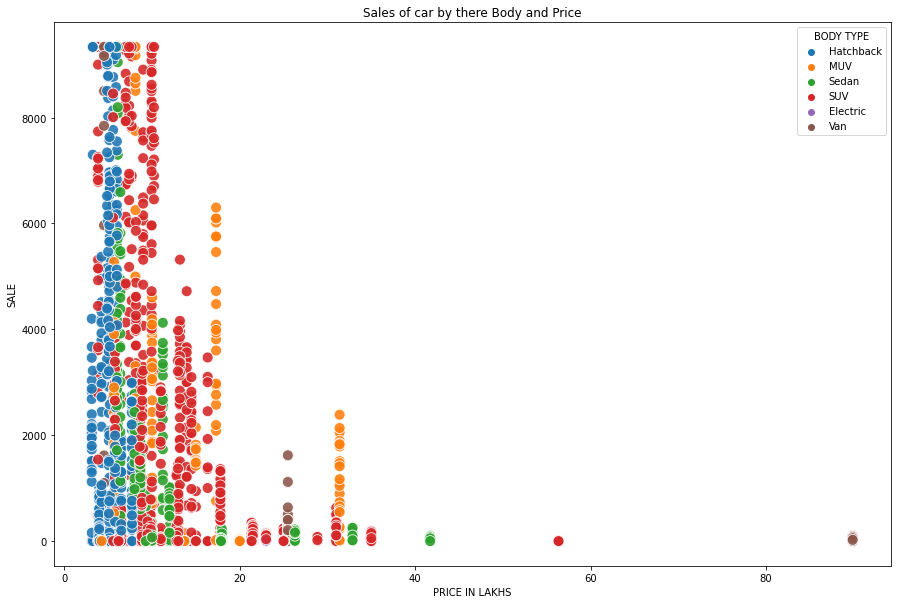

In [76]:
plt.figure(figsize = (15,10))
sns.scatterplot(data=df,x = 'PRICE IN LAKHS',y='SALE',hue = 'BODY TYPE',alpha = .89,s =120)
plt.title('Sales of car by there Body and Price')
plt.show()


In [77]:
df.corr()

,PRICE IN LAKHS,YEAR,MONTH,SALE
PRICE IN LAKHS,1.000000,0.000147,-0.004222,-0.357019
YEAR,0.000147,1.000000,-0.005921,0.091181
MONTH,-0.004222,-0.005921,1.000000,0.050189
SALE,-0.357019,0.091181,0.050189,1.000000


Text(0.5, 1.0, 'Crrelation of Dataset')

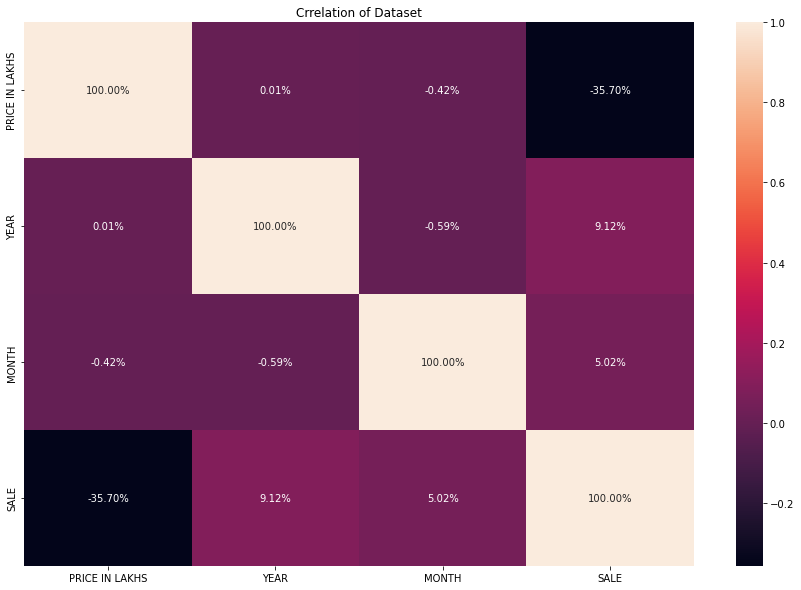

In [79]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True,fmt = '.2%')
plt.title("Crrelation of Dataset")

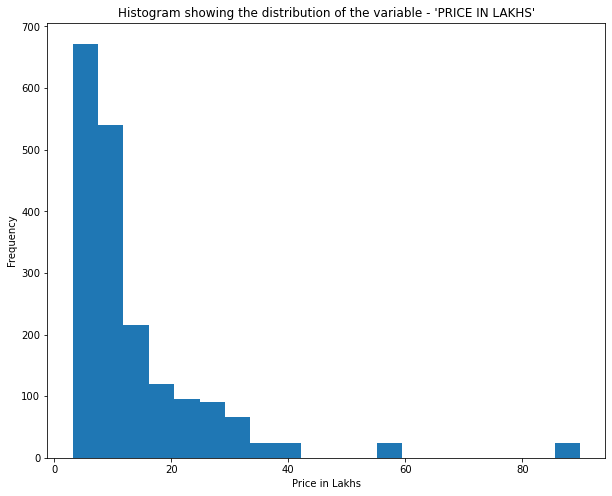

In [100]:
plt.figure(figsize = (10,8))
plt.hist(df['PRICE IN LAKHS'],bins =20)
plt.xlabel("Price in Lakhs")
plt.ylabel("Frequency")
plt.title("Histogram showing the distribution of the variable - 'PRICE IN LAKHS'")
plt.show()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OEM             1896 non-null   object 
 1   MODEL           1896 non-null   object 
 2   BODY TYPE       1896 non-null   object 
 3   PRICE IN LAKHS  1896 non-null   float64
 4   YEAR            1896 non-null   int64  
 5   MONTH           1896 non-null   int64  
 6   SALE            1896 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 103.8+ KB


In [86]:
df["BODY TYPE"].value_counts()

SUV          834
Hatchback    432
Sedan        348
MUV          186
Van           72
Electric      24
Name: BODY TYPE, dtype: int64

In [87]:
df['MODEL'].value_counts()

Go        24
Dzire     24
Kodiaq    24
Triber    24
Kwid      24
          ..
XUV700     6
Astor      6
Kushaq     6
Punch      6
Taigun     6
Name: MODEL, Length: 89, dtype: int64

In [88]:
df['OEM'].value_counts()

Maruti Suzuki    348
Hyundai          252
Mahindra         234
Toyota           162
Tata             150
Honda            132
Skoda            120
Volkswagen       102
Renault           96
Datsun            72
MG                72
Kia               66
Jeep              48
Nissan            42
Name: OEM, dtype: int64

In [214]:
x = df.iloc[:,0:6]
y = df.iloc[:,-1]

In [215]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

In [216]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [217]:
ohe = OneHotEncoder()
ohe.fit(x[['OEM','MODEL','BODY TYPE']])

OneHotEncoder()

In [218]:
col_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['OEM','MODEL','BODY TYPE']),remainder = 'passthrough')

In [219]:
#Linearregression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [220]:
from sklearn.pipeline import make_pipeline

In [221]:
lr_pipe = make_pipeline(col_trans,lr)

In [222]:
lr_pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Datsun', 'Honda', 'Hyundai', 'Jeep', 'Kia', 'MG', 'Mahindra',
       'Maruti Suzuki', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen'], dtype=object),
                                                                            array(['Alcazar', 'Alto', 'Altroz', 'Alturas G4', 'Amaze', 'Astor',
       'Bal...
       'Thar', 'Tiago', 'Tigor', 'Tiguan', 'Triber', 'Tucson',
       'Urban Cruiser', 'Vellfire', 'Vento', 'Venue', 'Verito, Vibe',
       'Verna', 'Vitara Brezza', 'WRV', 'WagonR', 'Wrangler', 'XL6',
       'XUV300', 'XUV500', 'XUV700', 'Xcent, Aura', 'Yaris', 'ZS EV',
       'i20'], dtype=object),
                                                                            array(['Electric', 'Hatchback', 'MUV', 'SUV

In [223]:
y_pred = lr_pipe.predict(x_test)


In [224]:
from sklearn.metrics import r2_score

In [225]:
scores = []
for i in range(1000):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=i)
    lr= LinearRegression()
    lr_pipe = make_pipeline(col_trans,lr)
    lr_pipe.fit(x_train, y_train)
    y_pred=lr_pipe.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [226]:
np.argmax(scores)

902

In [227]:
scores[np.argmax(scores)]

0.8396894105571325

In [228]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=np.argmax(scores))
lr= LinearRegression()
lr_pipe = make_pipeline(col_trans,lr)
lr_pipe.fit(x_train, y_train)
y_pred=lr_pipe.predict(x_test)
r2_lr=r2_score(y_test,y_pred)
r2_lr

0.8396894105571325

In [229]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [230]:
rfr_pipeline  = make_pipeline(col_trans,rfr)

In [231]:
rfr_pipeline.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Datsun', 'Honda', 'Hyundai', 'Jeep', 'Kia', 'MG', 'Mahindra',
       'Maruti Suzuki', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen'], dtype=object),
                                                                            array(['Alcazar', 'Alto', 'Altroz', 'Alturas G4', 'Amaze', 'Astor',
       'Bal...
       'Urban Cruiser', 'Vellfire', 'Vento', 'Venue', 'Verito, Vibe',
       'Verna', 'Vitara Brezza', 'WRV', 'WagonR', 'Wrangler', 'XL6',
       'XUV300', 'XUV500', 'XUV700', 'Xcent, Aura', 'Yaris', 'ZS EV',
       'i20'], dtype=object),
                                                                            array(['Electric', 'Hatchback', 'MUV', 'SUV', 'Sedan', 'Van'],
      dtype=object)]),
                    

In [232]:
y_pred = rfr_pipeline.predict(x_test)

In [233]:
scores=[]
for i in range(1000):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=i)
    rfr=RandomForestRegressor(n_estimators = 10)
    rfr_pipeline = make_pipeline(col_trans,rfr)
    rfr_pipeline.fit(x_train, y_train)
    y_pred=rfr_pipeline.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [234]:
np.argmax(scores)

437

In [235]:
scores[np.argmax(scores)]

0.9385698915369527

In [236]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=np.argmax(scores))
rfr=RandomForestRegressor(n_estimators = 10)
rfr_pipeline = make_pipeline(col_trans,rfr)
rfr_pipeline.fit(x_train, y_train)
y_pred=rfr_pipeline.predict(x_test)
r2_rfr=r2_score(y_test,y_pred)
r2_rfr

0.9220996731864004

In [237]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [238]:
dtr_pipe = make_pipeline(col_trans,dtr)

In [239]:
dtr_pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Datsun', 'Honda', 'Hyundai', 'Jeep', 'Kia', 'MG', 'Mahindra',
       'Maruti Suzuki', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen'], dtype=object),
                                                                            array(['Alcazar', 'Alto', 'Altroz', 'Alturas G4', 'Amaze', 'Astor',
       'Bal...
       'Thar', 'Tiago', 'Tigor', 'Tiguan', 'Triber', 'Tucson',
       'Urban Cruiser', 'Vellfire', 'Vento', 'Venue', 'Verito, Vibe',
       'Verna', 'Vitara Brezza', 'WRV', 'WagonR', 'Wrangler', 'XL6',
       'XUV300', 'XUV500', 'XUV700', 'Xcent, Aura', 'Yaris', 'ZS EV',
       'i20'], dtype=object),
                                                                            array(['Electric', 'Hatchback', 'MUV', 'SUV

In [240]:
y_pred = dtr_pipe.predict(x_test)

In [241]:
scores=[]
for i in range(1000):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=i)
    dtr = DecisionTreeRegressor(random_state = 0)
    dtr_pipe = make_pipeline(col_trans,dtr)
    dtr_pipe.fit(x_train, y_train)
    y_pred=dtr_pipe.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [242]:
np.argmax(scores)

437

In [243]:
scores[np.argmax(scores)]

0.9312797205328399

In [244]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=np.argmax(scores))
dtr = DecisionTreeRegressor(random_state = 0)
dtr_pipe = make_pipeline(col_trans,dtr)
dtr_pipe.fit(x_train, y_train)
y_pred=dtr_pipe.predict(x_test)
r2_dtr=r2_score(y_test,y_pred)
r2_dtr

0.9312797205328399

In [245]:
from tabulate import tabulate

In [246]:
table = []
table.append(['Sr.No.', 'Regression Model', 'R-squared value'])
table.append(['1', 'Linear Regression', r2_lr])
table.append(['2', 'Decision Tree Regression', r2_dtr])
table.append(['3', 'Random Forest Regression', r2_rfr])

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════╤══════════════════════════╤═══════════════════╕
│   Sr.No. │ Regression Model         │   R-squared value │
╞══════════╪══════════════════════════╪═══════════════════╡
│        1 │ Linear Regression        │          0.839689 │
├──────────┼──────────────────────────┼───────────────────┤
│        2 │ Decision Tree Regression │          0.93128  │
├──────────┼──────────────────────────┼───────────────────┤
│        3 │ Random Forest Regression │          0.9221   │
╘══════════╧══════════════════════════╧═══════════════════╛


In [258]:
v1 = lr_pipe.predict(pd.DataFrame([['Maruti Suzuki','Swift','Hatchback',5.9,2023,1]],columns=['OEM','MODEL','BODY TYPE','PRICE IN LAKHS','YEAR','MONTH']))
v2 = dtr_pipe.predict(pd.DataFrame([['Maruti Suzuki','Swift','Hatchback',5.9,2023,1]],columns=['OEM','MODEL','BODY TYPE','PRICE IN LAKHS','YEAR','MONTH']))
v3 = rfr_pipeline.predict(pd.DataFrame([['Maruti Suzuki','Swift','Hatchback',5.9,2023,1]],columns=['OEM','MODEL','BODY TYPE','PRICE IN LAKHS','YEAR','MONTH']))

In [259]:
print("Sale of Mahindra Swift in January 2023 will be")
print("By Linear Regression Model :",int(v1))
print("By Desision Tree Regression Model :",int(v2))
print("By Random Forest Regression Model :",int(v3))

Sale of Mahindra Swift in January 2023 will be
By Linear Regression Model : 8510
By Desision Tree Regression Model : 9334
By Random Forest Regression Model : 9334
